In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('auto_insurance.csv')
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


In [3]:
df.shape

(1000, 40)

In [4]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

In [5]:
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [6]:
#_c39 column contains only null values.
#So we are dropping the column.
df=df.drop(columns=['_c39'],axis=1)

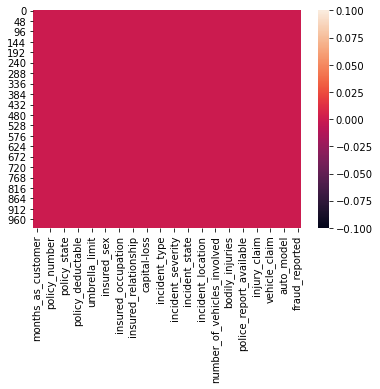

In [7]:
sns.heatmap(df.isnull())
plt.show()

# EDA

In [8]:
df.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000


In [9]:
df.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

In [10]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

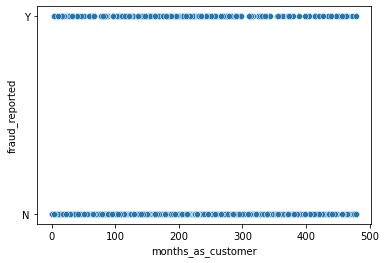

In [11]:
sns.scatterplot(x=df['months_as_customer'],y=df['fraud_reported'])
plt.show()

<AxesSubplot:xlabel='months_as_customer', ylabel='Density'>

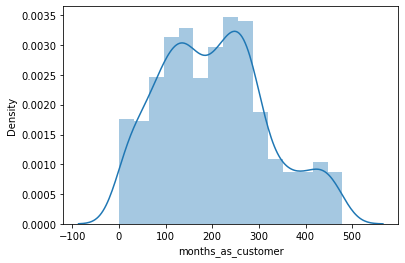

In [12]:
sns.distplot(df['months_as_customer'])
#skewness present

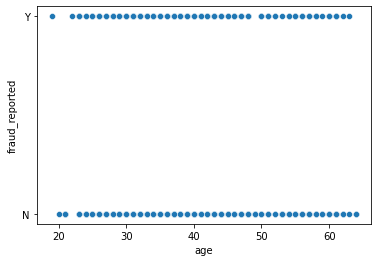

In [13]:
sns.scatterplot(x=df['age'],y=df['fraud_reported'])
plt.show()
#fraud reports are not much dendent on age.

<AxesSubplot:xlabel='age', ylabel='Density'>

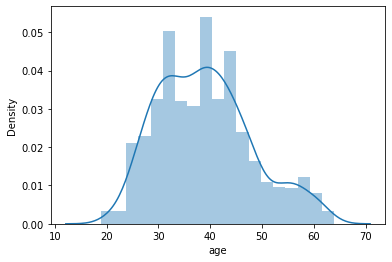

In [14]:
sns.distplot(df['age'])
#skewness present

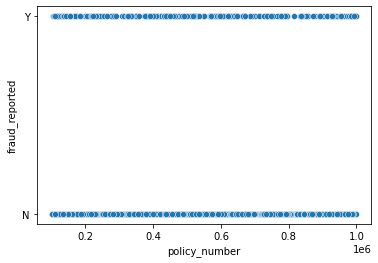

In [15]:
sns.scatterplot(x=df['policy_number'],y=df['fraud_reported'])
plt.show()

In [16]:
df['policy_number'].nunique()

#all policy numbers are unique

1000

In [17]:
#converting policy_bind_date to datetime format
df['policy_bind_date']=pd.to_datetime(df['policy_bind_date'])

<AxesSubplot:xlabel='policy_bind_date', ylabel='fraud_reported'>

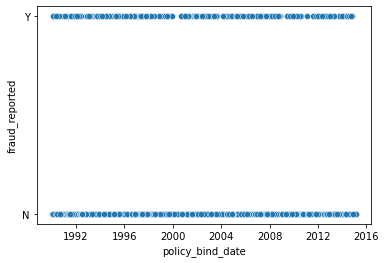

In [18]:
sns.scatterplot(df['policy_bind_date'],df['fraud_reported'])

#no conclusion possible

<AxesSubplot:xlabel='policy_bind_date', ylabel='Density'>

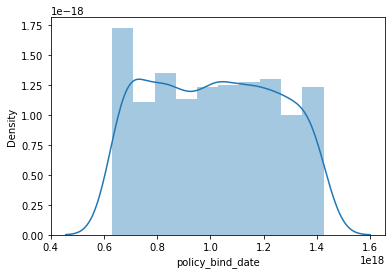

In [19]:
sns.distplot(df['policy_bind_date'])
#skewness present

In [20]:
df['policy_state'].nunique()

3

In [21]:
#label_encoding policy_state column
df['policy_state']=le.fit_transform(df['policy_state'])

In [22]:
df['policy_csl']

0       250/500
1       250/500
2       100/300
3       250/500
4      500/1000
         ...   
995    500/1000
996     100/300
997     250/500
998    500/1000
999     250/500
Name: policy_csl, Length: 1000, dtype: object

In [23]:
separator1=lambda x:x.split('/')[0]

In [24]:
df['policy_csl_n']=df['policy_csl'].apply(separator1).astype(int)

In [25]:
df['policy_csl_n']

0      250
1      250
2      100
3      250
4      500
      ... 
995    500
996    100
997    250
998    500
999    250
Name: policy_csl_n, Length: 1000, dtype: int32

In [26]:
separator2=lambda x:x.split('/')[1]

In [27]:
df['policy_csl_d']=df['policy_csl'].apply(separator2).astype(int)

In [28]:
df['policy_csl_d']

0       500
1       500
2       300
3       500
4      1000
       ... 
995    1000
996     300
997     500
998    1000
999     500
Name: policy_csl_d, Length: 1000, dtype: int32

In [29]:
df['policy_csl_n/d']=df['policy_csl_n']/df['policy_csl_d']

<AxesSubplot:xlabel='policy_csl_n/d', ylabel='fraud_reported'>

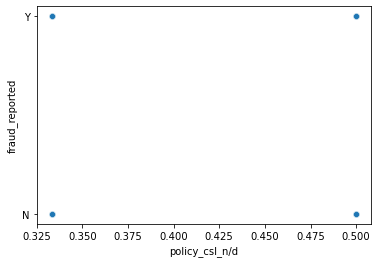

In [30]:
sns.scatterplot(df['policy_csl_n/d'],df['fraud_reported'])

In [31]:
df['policy_csl_n/d'].nunique()

2

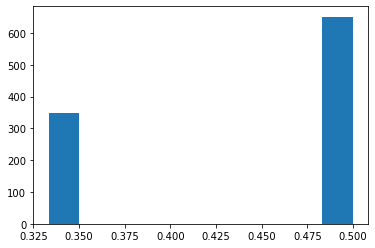

In [32]:
plt.hist(df['policy_csl_n/d'])
plt.show()

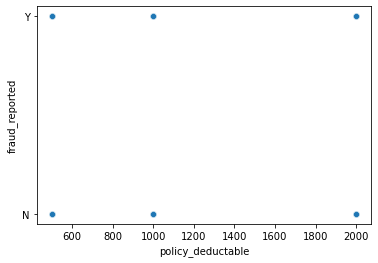

In [33]:
sns.scatterplot(df['policy_deductable'],df['fraud_reported'])
plt.show()

<AxesSubplot:xlabel='policy_deductable', ylabel='Count'>

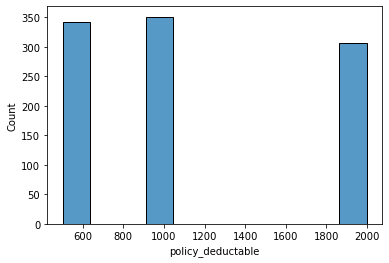

In [34]:
sns.histplot(df['policy_deductable'])

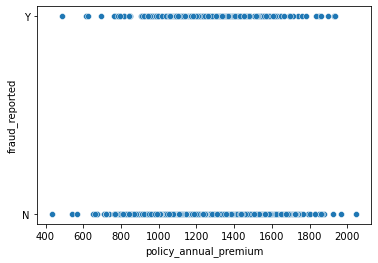

In [35]:
sns.scatterplot(df['policy_annual_premium'],df['fraud_reported'])
plt.show()

<AxesSubplot:xlabel='policy_annual_premium', ylabel='Density'>

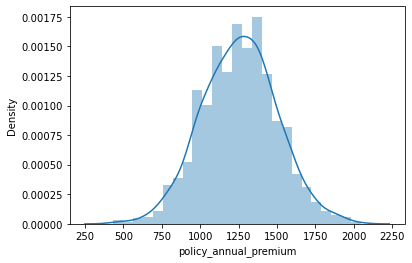

In [36]:
sns.distplot(df['policy_annual_premium'])

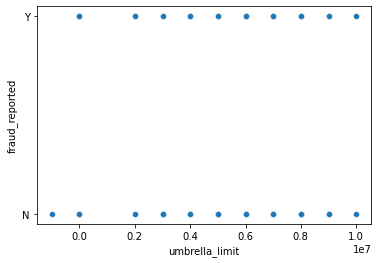

In [37]:
sns.scatterplot(df['umbrella_limit'],df['fraud_reported'])
plt.show()

<AxesSubplot:xlabel='umbrella_limit', ylabel='Count'>

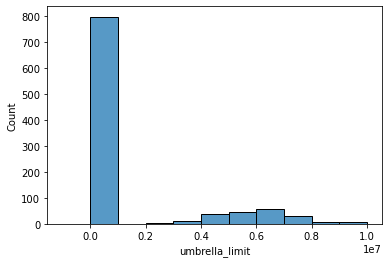

In [38]:
sns.histplot(df['umbrella_limit'])

#most people have no umbrella limit.

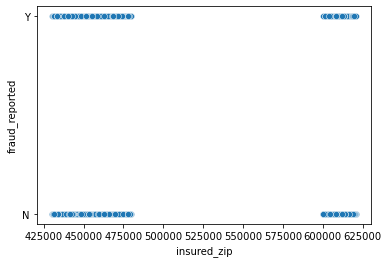

In [39]:
sns.scatterplot(df['insured_zip'],df['fraud_reported'])
plt.show()

<AxesSubplot:xlabel='insured_zip', ylabel='Density'>

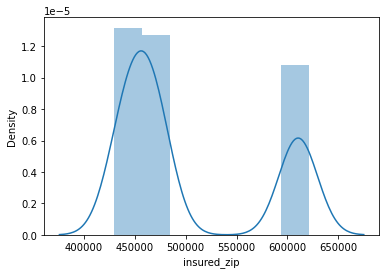

In [40]:
sns.distplot(df['insured_zip'])

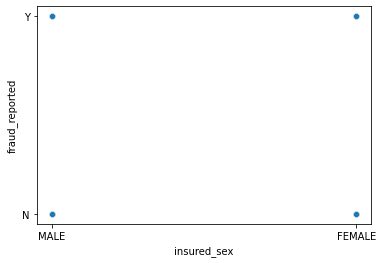

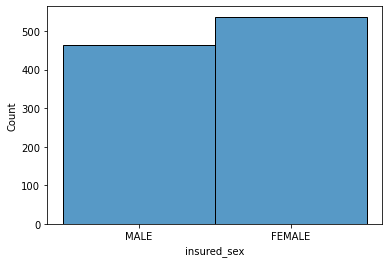

In [41]:
sns.scatterplot(df['insured_sex'],df['fraud_reported'])
plt.show()
sns.histplot(df['insured_sex'])
plt.show()

In [42]:
df['insured_sex']=le.fit_transform(df['insured_sex'])

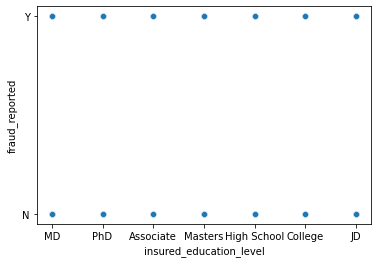

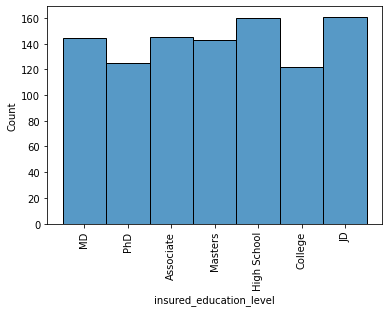

In [43]:
sns.scatterplot(df['insured_education_level'],df['fraud_reported'])
plt.show()
sns.histplot(df['insured_education_level'])
plt.xticks(rotation=90)
plt.show()

In [44]:
df['insured_education_level']=le.fit_transform(df['insured_education_level'])

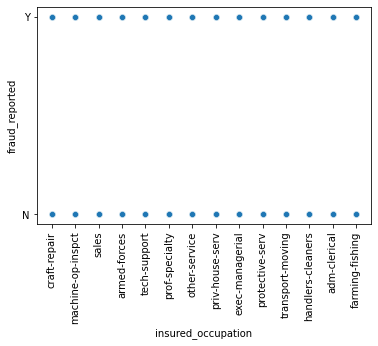

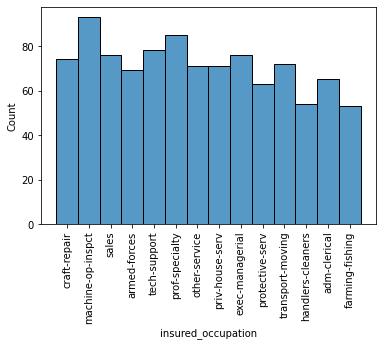

In [45]:
sns.scatterplot(df['insured_occupation'],df['fraud_reported'])
plt.xticks(rotation=90)
plt.show()

sns.histplot(df['insured_occupation'])
plt.xticks(rotation=90)
plt.show()

In [46]:
df['insured_occupation']=le.fit_transform(df['insured_occupation'])

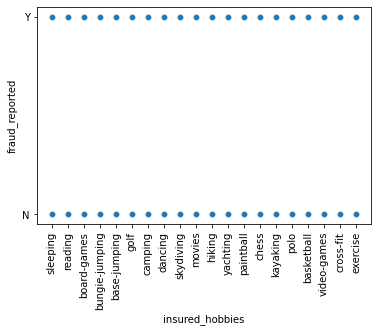

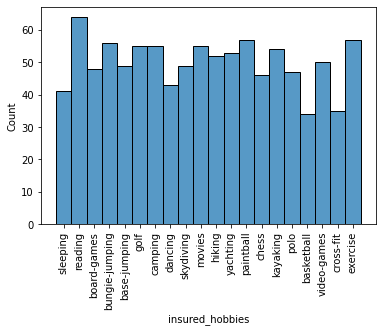

In [47]:
sns.scatterplot(df['insured_hobbies'],df['fraud_reported'])
plt.xticks(rotation=90)
plt.show()

sns.histplot(df['insured_hobbies'])
plt.xticks(rotation=90)
plt.show()

In [48]:
df['insured_hobbies']=le.fit_transform(df['insured_hobbies'])

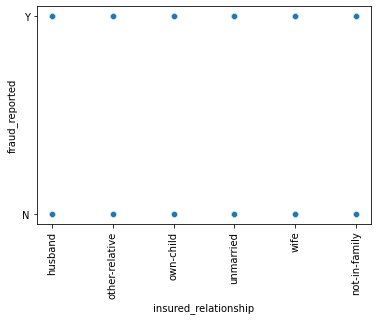

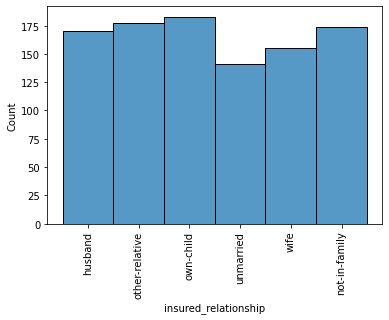

In [49]:
sns.scatterplot(df['insured_relationship'],df['fraud_reported'])
plt.xticks(rotation=90)
plt.show()

sns.histplot(df['insured_relationship'])
plt.xticks(rotation=90)
plt.show()

In [50]:
df['insured_relationship']=le.fit_transform(df['insured_relationship'])

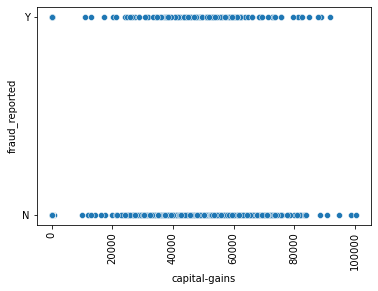

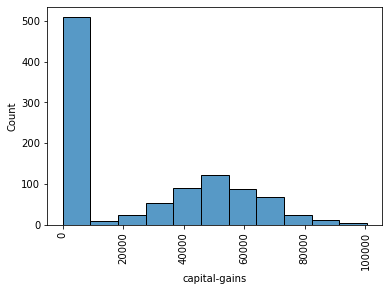

In [51]:
sns.scatterplot(df['capital-gains'],df['fraud_reported'])
plt.xticks(rotation=90)
plt.show()

sns.histplot(df['capital-gains'])
plt.xticks(rotation=90)
plt.show()

#most customers have 0 capital gains

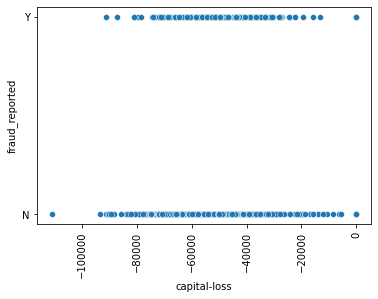

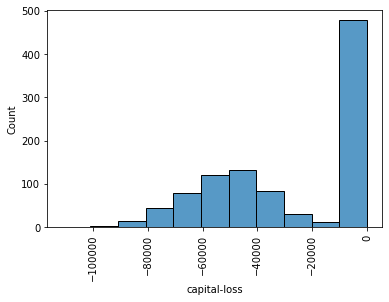

In [52]:
sns.scatterplot(df['capital-loss'],df['fraud_reported'])
plt.xticks(rotation=90)
plt.show()

sns.histplot(df['capital-loss'])
plt.xticks(rotation=90)
plt.show()

#most customers have zero capital loss.

In [53]:
df['incident_date']=pd.to_datetime(df['incident_date'])

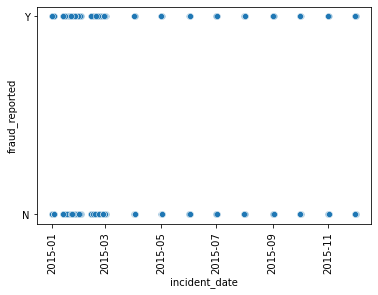

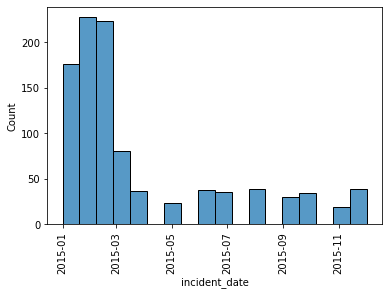

In [54]:
sns.scatterplot(df['incident_date'],df['fraud_reported'])
plt.xticks(rotation=90)
plt.show()

sns.histplot(df['incident_date'])
plt.xticks(rotation=90)
plt.show()

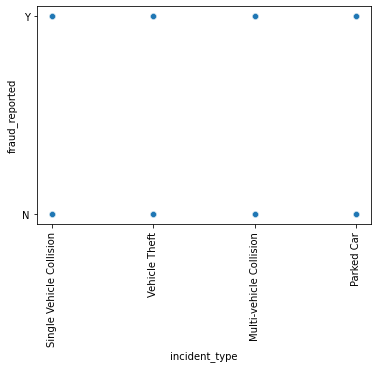

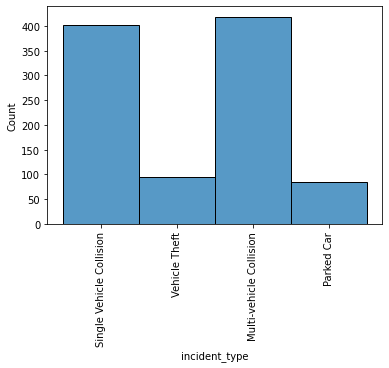

In [55]:
sns.scatterplot(df['incident_type'],df['fraud_reported'])
plt.xticks(rotation=90)
plt.show()

sns.histplot(df['incident_type'])
plt.xticks(rotation=90)
plt.show()

In [56]:
df['incident_type']=le.fit_transform(df['incident_type'])

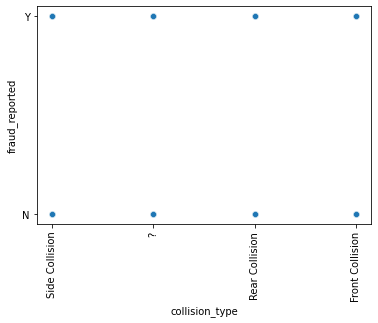

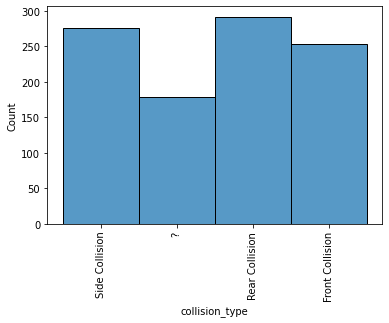

In [57]:
sns.scatterplot(df['collision_type'],df['fraud_reported'])
plt.xticks(rotation=90)
plt.show()

sns.histplot(df['collision_type'])
plt.xticks(rotation=90)
plt.show()

In [58]:
df['collision_type']=le.fit_transform(df['collision_type'])

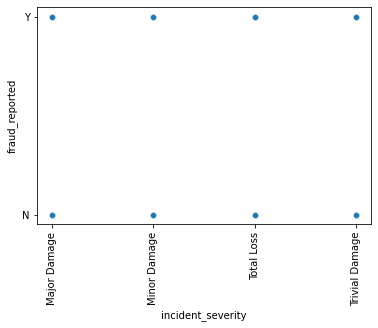

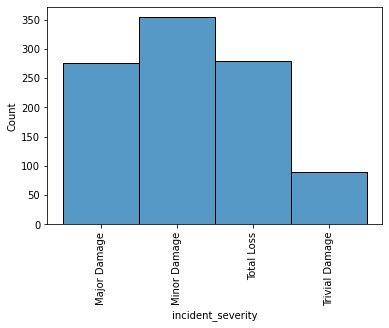

In [59]:
sns.scatterplot(df['incident_severity'],df['fraud_reported'])
plt.xticks(rotation=90)
plt.show()

sns.histplot(df['incident_severity'])
plt.xticks(rotation=90)
plt.show()

In [60]:
df['incident_severity']=le.fit_transform(df['incident_severity'])

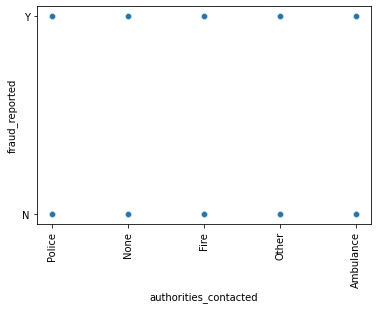

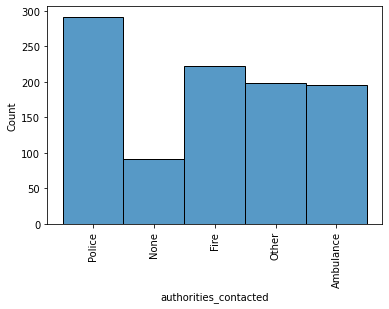

In [61]:
sns.scatterplot(df['authorities_contacted'],df['fraud_reported'])
plt.xticks(rotation=90)
plt.show()

sns.histplot(df['authorities_contacted'])
plt.xticks(rotation=90)
plt.show()

In [62]:
df['authorities_contacted']=le.fit_transform(df['authorities_contacted'])

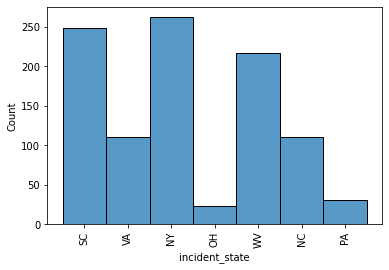

In [63]:
sns.histplot(df['incident_state'])
plt.xticks(rotation=90)
plt.show()

In [64]:
df['incident_state']=le.fit_transform(df['incident_state'])

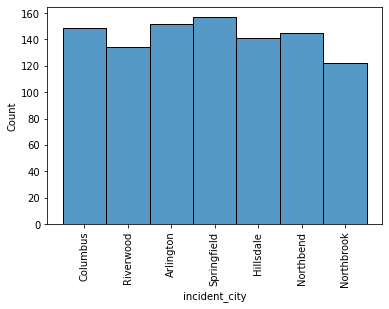

In [65]:
sns.histplot(df['incident_city'])
plt.xticks(rotation=90)
plt.show()

In [66]:
df['incident_city']=le.fit_transform(df['incident_city'])

In [67]:
df['incident_location'].nunique()

#all incident locattins are different

1000

In [68]:
df['incident_location']=le.fit_transform(df['incident_location'])

In [69]:
df['incident_hour_of_the_day'].nunique()

24

In [70]:
df['incident_hour_of_the_day'].dtype

dtype('int64')

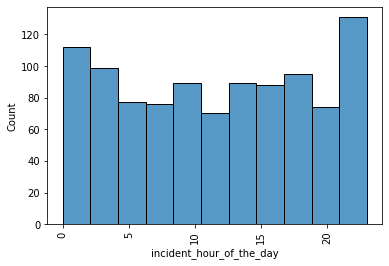

In [71]:
sns.histplot(df['incident_hour_of_the_day'])
plt.xticks(rotation=90)
plt.show()

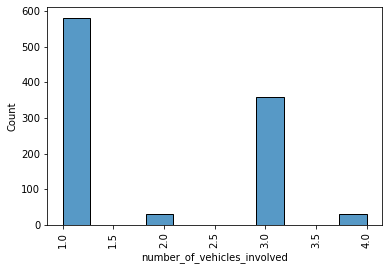

In [72]:
sns.histplot(df['number_of_vehicles_involved'])
plt.xticks(rotation=90)
plt.show()

#in most cases only one vehicle was involved.

In [73]:
df['property_damage'].nunique()

3

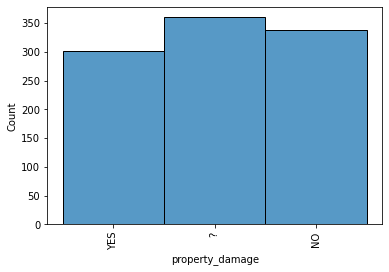

In [74]:
sns.histplot(df['property_damage'])
plt.xticks(rotation=90)
plt.show()

In [75]:
df['property_damage']=le.fit_transform(df['property_damage'])

In [76]:
df['bodily_injuries'].nunique()

3

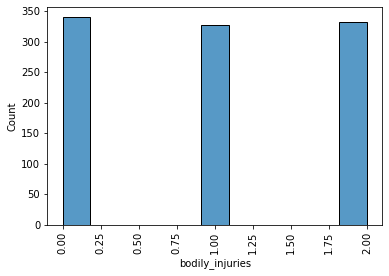

In [77]:
sns.histplot(df['bodily_injuries'])
plt.xticks(rotation=90)
plt.show()

In [78]:
df['witnesses'].unique()

array([2, 0, 3, 1], dtype=int64)

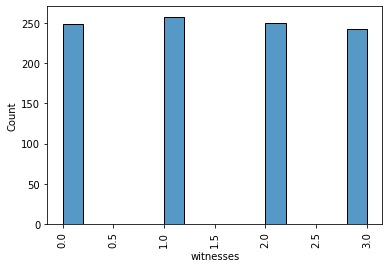

In [79]:
sns.histplot(df['witnesses'])
plt.xticks(rotation=90)
plt.show()

In [80]:
df['police_report_available'].unique()

array(['YES', '?', 'NO'], dtype=object)

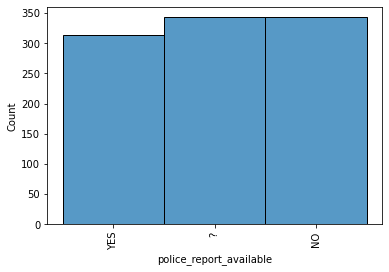

In [81]:
sns.histplot(df['police_report_available'])
plt.xticks(rotation=90)
plt.show()

In [82]:
df['police_report_available']=le.fit_transform(df['police_report_available'])

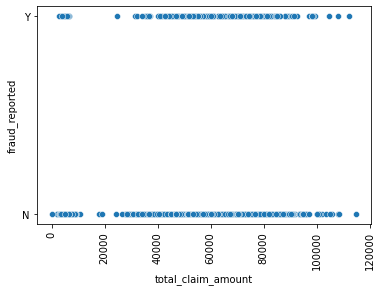

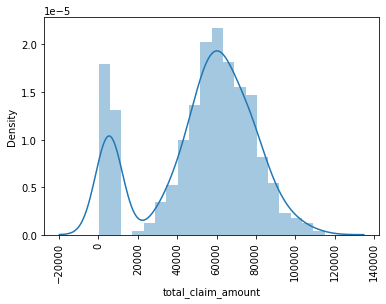

In [83]:
sns.scatterplot(df['total_claim_amount'],df['fraud_reported'])
plt.xticks(rotation=90)
plt.show()

sns.distplot(df['total_claim_amount'])
plt.xticks(rotation=90)
plt.show()

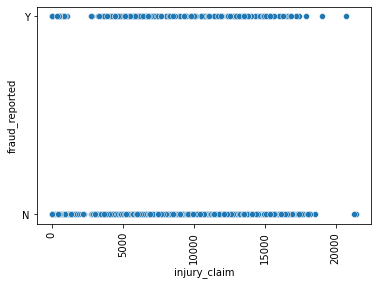

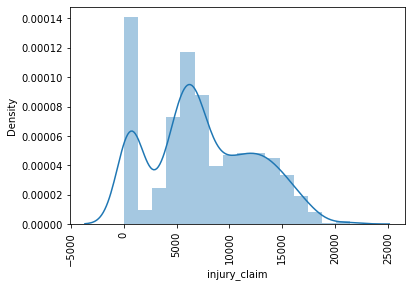

In [84]:
sns.scatterplot(df['injury_claim'],df['fraud_reported'])
plt.xticks(rotation=90)
plt.show()

sns.distplot(df['injury_claim'])
plt.xticks(rotation=90)
plt.show()

#skewness present

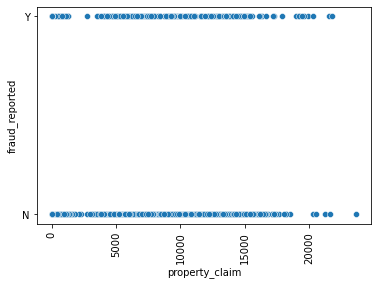

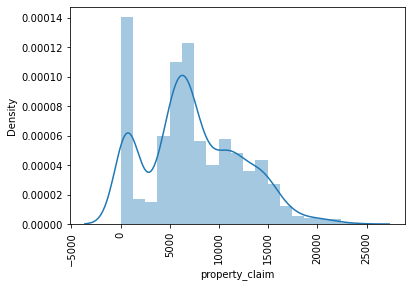

In [85]:
sns.scatterplot(df['property_claim'],df['fraud_reported'])
plt.xticks(rotation=90)
plt.show()

sns.distplot(df['property_claim'])
plt.xticks(rotation=90)
plt.show()

#skewness present 

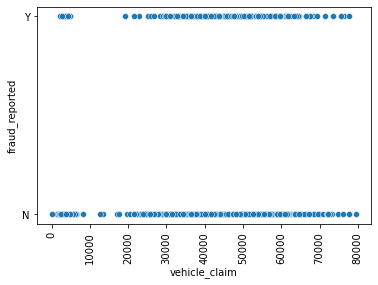

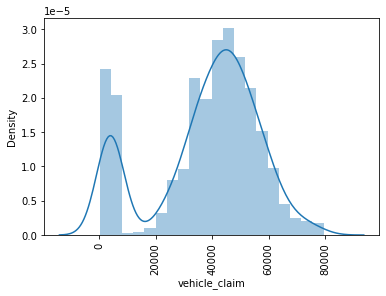

In [86]:
sns.scatterplot(df['vehicle_claim'],df['fraud_reported'])
plt.xticks(rotation=90)
plt.show()

sns.distplot(df['vehicle_claim'])
plt.xticks(rotation=90)
plt.show()

#skewness present

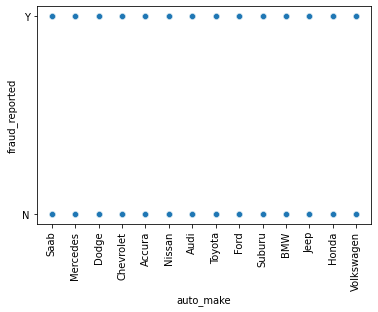

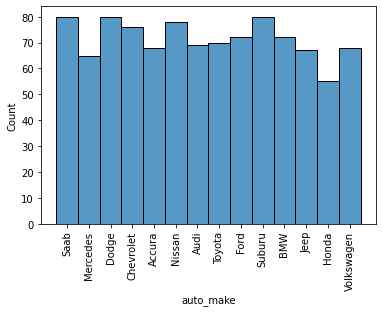

In [87]:
sns.scatterplot(df['auto_make'],df['fraud_reported'])
plt.xticks(rotation=90)
plt.show()

sns.histplot(df['auto_make'])
plt.xticks(rotation=90)
plt.show()

In [88]:
df['auto_make']=le.fit_transform(df['auto_make'])

In [89]:
df['auto_model']=le.fit_transform(df['auto_model'])

In [90]:
df['auto_year']

0      2004
1      2007
2      2007
3      2014
4      2009
       ... 
995    2006
996    2015
997    1996
998    1998
999    2007
Name: auto_year, Length: 1000, dtype: int64

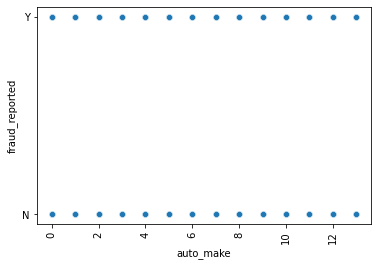

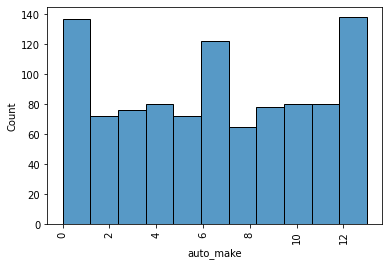

In [91]:
sns.scatterplot(df['auto_make'],df['fraud_reported'])
plt.xticks(rotation=90)
plt.show()

sns.histplot(df['auto_make'])
plt.xticks(rotation=90)
plt.show()

#accident cases are high for very new and very old vehicles.

In [92]:
df_new=df.drop(columns=['fraud_reported'],axis=1)
df_new['fraud_reported']=df['fraud_reported']
df=df_new

In [93]:
df['fraud_reported']=le.fit_transform(df['fraud_reported'])

In [94]:
df=df.drop(columns=['policy_csl'],axis=1)

In [95]:
df['pbd_year']=df['policy_bind_date'].dt.year
df['pbd_month']=df['policy_bind_date'].dt.month
df['pbd_day']=df['policy_bind_date'].dt.day

In [96]:
df=df.drop(columns=['policy_bind_date'],axis=1)

In [97]:
df['i_date_year']=df['incident_date'].dt.year
df['i_date_month']=df['incident_date'].dt.month
df['i_date_day']=df['incident_date'].dt.day

In [98]:
df=df.drop(columns=['incident_date'],axis=1)

<AxesSubplot:xlabel='fraud_reported', ylabel='count'>

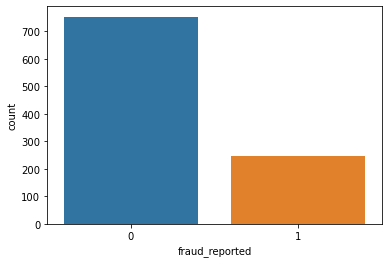

In [99]:
sns.countplot(df['fraud_reported'])

#imbalance present in data
#we need to apply SMOTE

In [100]:
df_new=df.drop(columns=['fraud_reported'],axis=1)
df_new['fraud_reported']=df['fraud_reported']
df=df_new

In [101]:
#
#
#

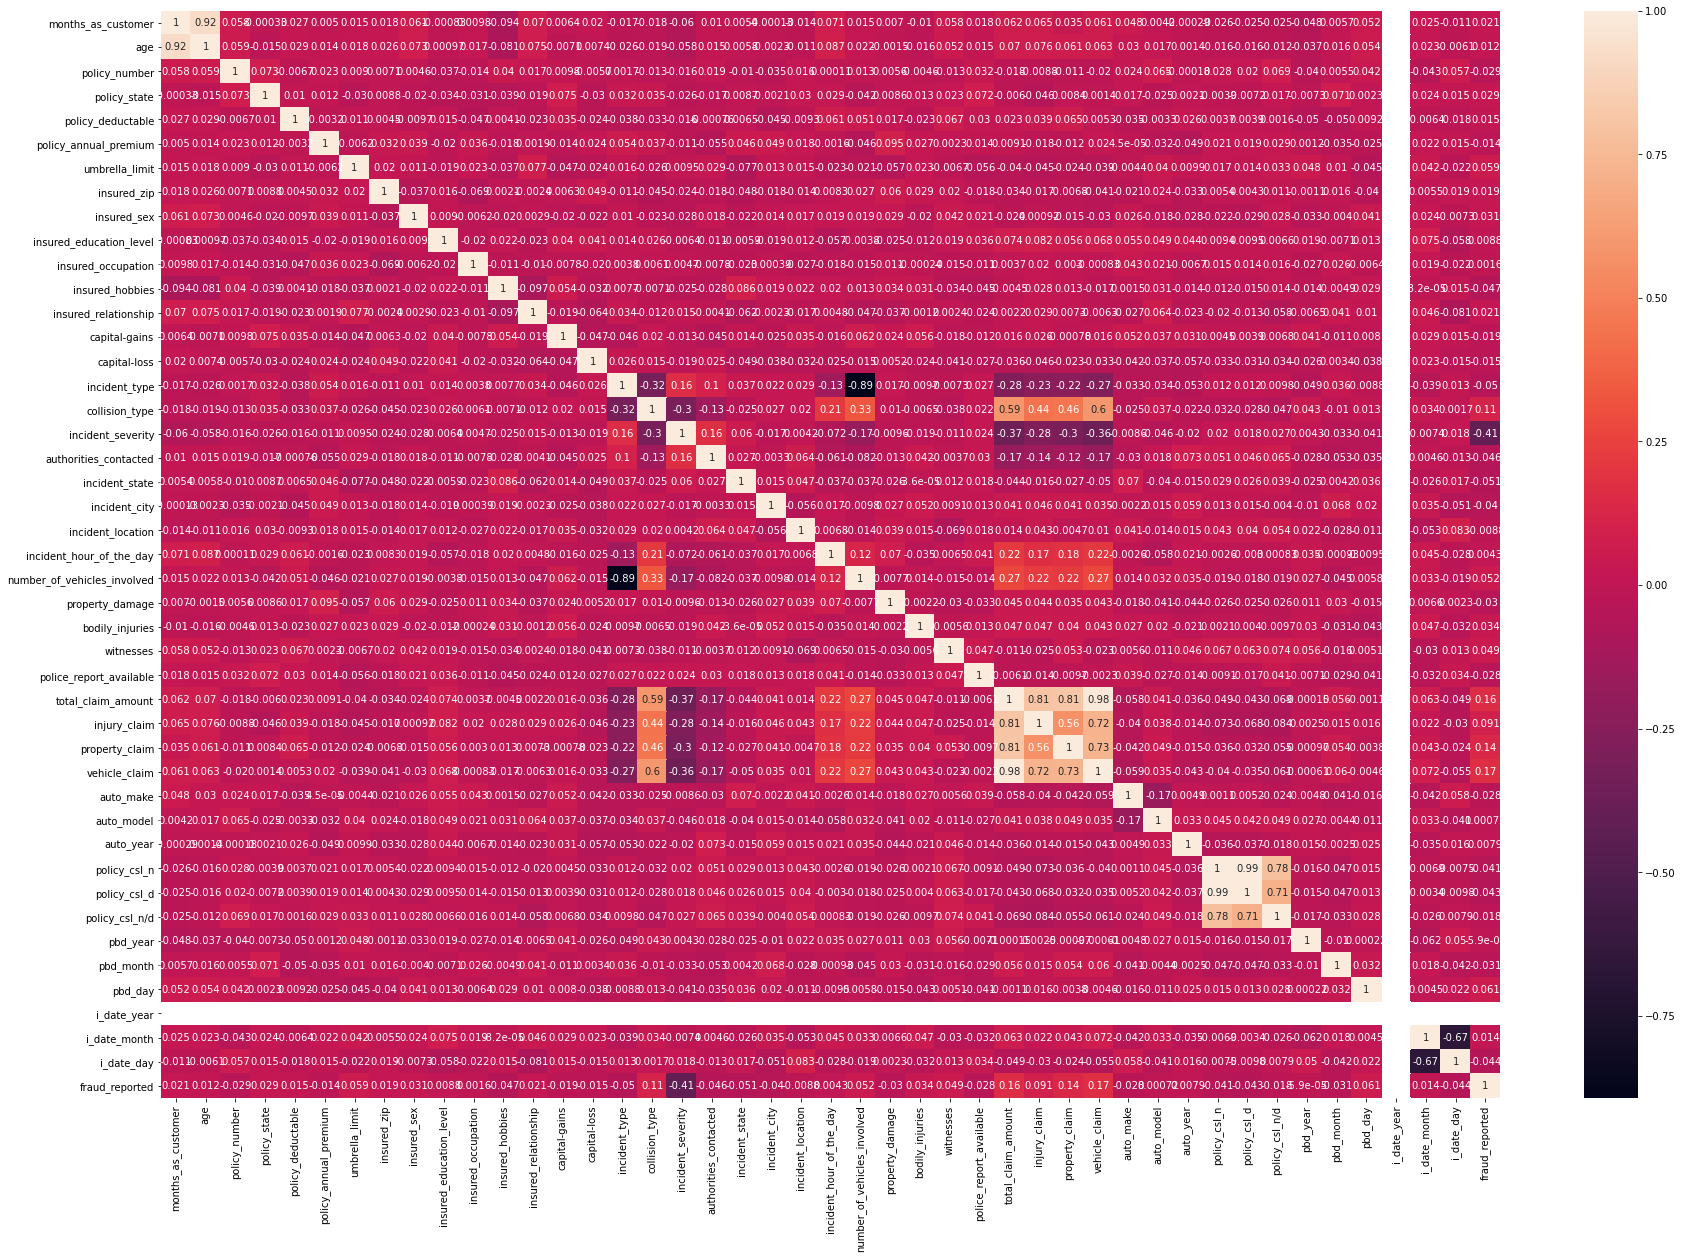

In [102]:
plt.figure(figsize=(30,20))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [103]:
df.skew().sort_values(ascending=False)

#all columns has low skewness. 

umbrella_limit                 1.806712
i_date_month                   1.375894
fraud_reported                 1.175051
insured_zip                    0.816554
policy_csl_d                   0.605587
number_of_vehicles_involved    0.502664
age                            0.478988
capital-gains                  0.478850
policy_deductable              0.477887
policy_csl_n                   0.410015
property_claim                 0.378169
months_as_customer             0.362177
incident_severity              0.279016
injury_claim                   0.264811
insured_sex                    0.148630
property_damage                0.106418
incident_type                  0.101507
insured_relationship           0.077488
i_date_day                     0.059111
police_report_available        0.052967
pbd_year                       0.052511
incident_city                  0.049531
policy_number                  0.038991
pbd_day                        0.024372
witnesses                      0.019636


In [104]:
df.corr()['fraud_reported'].sort_values(ascending=False)

fraud_reported                 1.000000
vehicle_claim                  0.170049
total_claim_amount             0.163651
property_claim                 0.137835
collision_type                 0.110130
injury_claim                   0.090975
pbd_day                        0.060643
umbrella_limit                 0.058622
number_of_vehicles_involved    0.051839
witnesses                      0.049497
bodily_injuries                0.033877
insured_sex                    0.030873
policy_state                   0.029432
insured_relationship           0.021043
months_as_customer             0.020544
insured_zip                    0.019368
policy_deductable              0.014817
i_date_month                   0.014495
age                            0.012143
insured_education_level        0.008808
auto_year                      0.007928
incident_hour_of_the_day       0.004316
insured_occupation             0.001564
auto_model                     0.000720
pbd_year                      -0.000059


In [105]:
#auto_model has very less correlation with target.
#i_date_year has very correlation with target.
#pbd_year has very low correlation with target.
#So we are removing it.
df.drop(columns=['auto_model','i_date_year','pbd_year'],axis=1,inplace=True)

In [106]:
#Since the dataset is imbalanced, we are applying SMOTE on it
x=df.iloc[:,0:-1]
y=df.iloc[:,-1]

from imblearn.over_sampling import SMOTE
smt=SMOTE()
x,y=smt.fit_resample(x,y) 

In [107]:
df=x
df['fraud_reported']=y

<AxesSubplot:xlabel='fraud_reported', ylabel='count'>

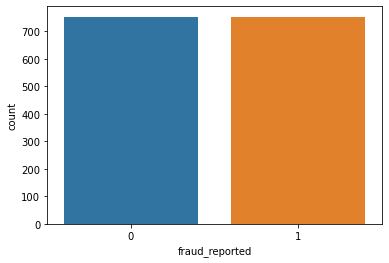

In [108]:
sns.countplot(df['fraud_reported'])

In [109]:
#here we will be creating two datasets.
#One dataset will contain all columns----->df_irev
#One dataset will contain only the columns which has high correlation with target----->df

In [110]:
#creating df_irev
df_irev=df

In [111]:
#creating df
df=df.drop(columns=['insured_education_level','auto_year','incident_hour_of_the_day','insured_occupation','incident_location'],axis=1)

In [112]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import warnings
warnings.filterwarnings('ignore')

In [113]:
x=df.iloc[:,0:-1]
y=df.iloc[:,-1]

x1=df_irev.iloc[:,0:-1]
y1=df_irev.iloc[:,-1]

In [845]:
#df
#trying without PCA

#pca=PCA(n_components=7)
#xpca=pca.fit_transform(x)
#xpca=pd.DataFrame(xpca)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.22,random_state=45)
lr=LogisticRegression()
lr.fit(x_train,y_train)
y_pred_lr=lr.predict(x_test)
print("Accuarcy_score for LogisticRegression is: ",accuracy_score(y_test,y_pred_lr))

rfr=RandomForestClassifier()
rfr.fit(x_train,y_train)
y_pred_rfr=rfr.predict(x_test)
print("Accuarcy_score for RandomForestClassifier is: ",accuracy_score(y_test,y_pred_rfr))

knr=KNeighborsClassifier()
knr.fit(x_train,y_train)
y_pred_knr=knr.predict(x_test)
print("Accuarcy_score for KNeighborsClassifier is: ",accuracy_score(y_test,y_pred_knr))

gnb=GaussianNB()
gnb.fit(x_train,y_train)
y_pred=gnb.predict(x_test)
print("Accuarcy_score for GaussianNaiveBayes is: ",accuracy_score(y_test,y_pred_knr))


Accuarcy_score for LogisticRegression is:  0.5783132530120482
Accuarcy_score for RandomForestClassifier is:  0.8554216867469879
Accuarcy_score for KNeighborsClassifier is:  0.6475903614457831
Accuarcy_score for GaussianNaiveBayes is:  0.6475903614457831


In [850]:
#df
#trying different classification models with n_components=35

from sklearn.decomposition import PCA
pca=PCA(n_components=36)
xpca=pca.fit_transform(x)
xpca=pd.DataFrame(xpca)
x_train,x_test,y_train,y_test=train_test_split(xpca,y,test_size=0.22,random_state=45)
lr=LogisticRegression()
lr.fit(x_train,y_train)
y_pred_lr=lr.predict(x_test)
print("Accuarcy_score for LogisticRegression is: ",accuracy_score(y_test,y_pred_lr))

rfr=RandomForestClassifier()
rfr.fit(x_train,y_train)
y_pred_rfr=rfr.predict(x_test)
print("Accuarcy_score for RandomForestClassifier is: ",accuracy_score(y_test,y_pred_rfr))

knr=KNeighborsClassifier()
knr.fit(x_train,y_train)
y_pred_knr=knr.predict(x_test)
print("Accuarcy_score for KNeighborsClassifier is: ",accuracy_score(y_test,y_pred_knr))

gnb=GaussianNB()
gnb.fit(x_train,y_train)
y_pred=gnb.predict(x_test)
print("Accuarcy_score for GaussianNaiveBayes is: ",accuracy_score(y_test,y_pred_knr))


Accuarcy_score for LogisticRegression is:  0.5572289156626506
Accuarcy_score for RandomForestClassifier is:  0.8493975903614458
Accuarcy_score for KNeighborsClassifier is:  0.6475903614457831
Accuarcy_score for GaussianNaiveBayes is:  0.6475903614457831


In [847]:
#df
#trying different regression models with n_components=34

from sklearn.decomposition import PCA
pca=PCA(n_components=34)
xpca=pca.fit_transform(x)
xpca=pd.DataFrame(xpca)
x_train,x_test,y_train,y_test=train_test_split(xpca,y,test_size=0.22,random_state=45)
lr=LogisticRegression()
lr.fit(x_train,y_train)
y_pred_lr=lr.predict(x_test)
print("Accuarcy_score for LogisticRegression is: ",accuracy_score(y_test,y_pred_lr))

rfr=RandomForestClassifier()
rfr.fit(x_train,y_train)
y_pred_rfr=rfr.predict(x_test)
print("Accuarcy_score for RandomForestClassifier is: ",accuracy_score(y_test,y_pred_rfr))

knr=KNeighborsClassifier()
knr.fit(x_train,y_train)
y_pred_knr=knr.predict(x_test)
print("Accuarcy_score for KNeighborsClassifier is: ",accuracy_score(y_test,y_pred_knr))

gnb=GaussianNB()
gnb.fit(x_train,y_train)
y_pred=gnb.predict(x_test)
print("Accuarcy_score for GaussianNaiveBayes is: ",accuracy_score(y_test,y_pred_knr))


Accuarcy_score for LogisticRegression is:  0.5572289156626506
Accuarcy_score for RandomForestClassifier is:  0.8493975903614458
Accuarcy_score for KNeighborsClassifier is:  0.6475903614457831
Accuarcy_score for GaussianNaiveBayes is:  0.6475903614457831


In [848]:
#df
#trying different regression models with n_components=30

from sklearn.decomposition import PCA
pca=PCA(n_components=30)
xpca=pca.fit_transform(x)
xpca=pd.DataFrame(xpca)
x_train,x_test,y_train,y_test=train_test_split(xpca,y,test_size=0.22,random_state=45)
lr=LogisticRegression()
lr.fit(x_train,y_train)
y_pred_lr=lr.predict(x_test)
print("Accuarcy_score for LogisticRegression is: ",accuracy_score(y_test,y_pred_lr))

rfr=RandomForestClassifier()
rfr.fit(x_train,y_train)
y_pred_rfr=rfr.predict(x_test)
print("Accuarcy_score for RandomForestClassifier is: ",accuracy_score(y_test,y_pred_rfr))

knr=KNeighborsClassifier()
knr.fit(x_train,y_train)
y_pred_knr=knr.predict(x_test)
print("Accuarcy_score for KNeighborsClassifier is: ",accuracy_score(y_test,y_pred_knr))

gnb=GaussianNB()
gnb.fit(x_train,y_train)
y_pred=gnb.predict(x_test)
print("Accuarcy_score for GaussianNaiveBayes is: ",accuracy_score(y_test,y_pred_knr))


Accuarcy_score for LogisticRegression is:  0.5572289156626506
Accuarcy_score for RandomForestClassifier is:  0.8403614457831325
Accuarcy_score for KNeighborsClassifier is:  0.6475903614457831
Accuarcy_score for GaussianNaiveBayes is:  0.6475903614457831


In [849]:
#df
#trying different regression models with n_components=25

from sklearn.decomposition import PCA
pca=PCA(n_components=25)
xpca=pca.fit_transform(x)
xpca=pd.DataFrame(xpca)
x_train,x_test,y_train,y_test=train_test_split(xpca,y,test_size=0.22,random_state=45)
lr=LogisticRegression()
lr.fit(x_train,y_train)
y_pred_lr=lr.predict(x_test)
print("Accuarcy_score for LogisticRegression is: ",accuracy_score(y_test,y_pred_lr))

rfr=RandomForestClassifier()
rfr.fit(x_train,y_train)
y_pred_rfr=rfr.predict(x_test)
print("Accuarcy_score for RandomForestClassifier is: ",accuracy_score(y_test,y_pred_rfr))

knr=KNeighborsClassifier()
knr.fit(x_train,y_train)
y_pred_knr=knr.predict(x_test)
print("Accuarcy_score for KNeighborsClassifier is: ",accuracy_score(y_test,y_pred_knr))

gnb=GaussianNB()
gnb.fit(x_train,y_train)
y_pred=gnb.predict(x_test)
print("Accuarcy_score for GaussianNaiveBayes is: ",accuracy_score(y_test,y_pred_knr))


Accuarcy_score for LogisticRegression is:  0.5602409638554217
Accuarcy_score for RandomForestClassifier is:  0.8524096385542169
Accuarcy_score for KNeighborsClassifier is:  0.6475903614457831
Accuarcy_score for GaussianNaiveBayes is:  0.6475903614457831


In [851]:
#trying different regression models with n_components=10

from sklearn.decomposition import PCA
pca=PCA(n_components=10)
xpca=pca.fit_transform(x)
xpca=pd.DataFrame(xpca)
x_train,x_test,y_train,y_test=train_test_split(xpca,y,test_size=0.22,random_state=45)
lr=LogisticRegression()
lr.fit(x_train,y_train)
y_pred_lr=lr.predict(x_test)
print("Accuarcy_score for LogisticRegression is: ",accuracy_score(y_test,y_pred_lr))

rfr=RandomForestClassifier()
rfr.fit(x_train,y_train)
y_pred_rfr=rfr.predict(x_test)
print("Accuarcy_score for RandomForestClassifier is: ",accuracy_score(y_test,y_pred_rfr))

knr=KNeighborsClassifier()
knr.fit(x_train,y_train)
y_pred_knr=knr.predict(x_test)
print("Accuarcy_score for KNeighborsClassifier is: ",accuracy_score(y_test,y_pred_knr))

gnb=GaussianNB()
gnb.fit(x_train,y_train)
y_pred=gnb.predict(x_test)
print("Accuarcy_score for GaussianNaiveBayes is: ",accuracy_score(y_test,y_pred_knr))


Accuarcy_score for LogisticRegression is:  0.5572289156626506
Accuarcy_score for RandomForestClassifier is:  0.8313253012048193
Accuarcy_score for KNeighborsClassifier is:  0.6475903614457831
Accuarcy_score for GaussianNaiveBayes is:  0.6475903614457831


In [852]:
#trying different regression models with n_components=15

from sklearn.decomposition import PCA
pca=PCA(n_components=15)
xpca=pca.fit_transform(x)
xpca=pd.DataFrame(xpca)
x_train,x_test,y_train,y_test=train_test_split(xpca,y,test_size=0.22,random_state=45)
lr=LogisticRegression()
lr.fit(x_train,y_train)
y_pred_lr=lr.predict(x_test)
print("Accuarcy_score for LogisticRegression is: ",accuracy_score(y_test,y_pred_lr))

rfr=RandomForestClassifier()
rfr.fit(x_train,y_train)
y_pred_rfr=rfr.predict(x_test)
print("Accuarcy_score for RandomForestClassifier is: ",accuracy_score(y_test,y_pred_rfr))

knr=KNeighborsClassifier()
knr.fit(x_train,y_train)
y_pred_knr=knr.predict(x_test)
print("Accuarcy_score for KNeighborsClassifier is: ",accuracy_score(y_test,y_pred_knr))

gnb=GaussianNB()
gnb.fit(x_train,y_train)
y_pred=gnb.predict(x_test)
print("Accuarcy_score for GaussianNaiveBayes is: ",accuracy_score(y_test,y_pred_knr))


Accuarcy_score for LogisticRegression is:  0.5602409638554217
Accuarcy_score for RandomForestClassifier is:  0.8554216867469879
Accuarcy_score for KNeighborsClassifier is:  0.6475903614457831
Accuarcy_score for GaussianNaiveBayes is:  0.6475903614457831


In [853]:
#df_irev
#trying without PCA

#pca=PCA(n_components=7)
#xpca=pca.fit_transform(x)
#xpca=pd.DataFrame(xpca)
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.22,random_state=45)
lr=LogisticRegression()
lr.fit(x_train,y_train)
y_pred_lr=lr.predict(x_test)
print("Accuarcy_score for LogisticRegression is: ",accuracy_score(y_test,y_pred_lr))

rfr=RandomForestClassifier()
rfr.fit(x_train,y_train)
y_pred_rfr=rfr.predict(x_test)
print("Accuarcy_score for RandomForestClassifier is: ",accuracy_score(y_test,y_pred_rfr))

knr=KNeighborsClassifier()
knr.fit(x_train,y_train)
y_pred_knr=knr.predict(x_test)
print("Accuarcy_score for KNeighborsClassifier is: ",accuracy_score(y_test,y_pred_knr))

gnb=GaussianNB()
gnb.fit(x_train,y_train)
y_pred=gnb.predict(x_test)
print("Accuarcy_score for GaussianNaiveBayes is: ",accuracy_score(y_test,y_pred_knr))

#dataset df_irev is working pooer than df when no PCA is applied in both cases.

Accuarcy_score for LogisticRegression is:  0.5753012048192772
Accuarcy_score for RandomForestClassifier is:  0.8524096385542169
Accuarcy_score for KNeighborsClassifier is:  0.6475903614457831
Accuarcy_score for GaussianNaiveBayes is:  0.6475903614457831


In [854]:
#df
#trying different classification models with n_components=35

from sklearn.decomposition import PCA
pca=PCA(n_components=35)
xpca=pca.fit_transform(x)
xpca=pd.DataFrame(xpca)
x_train,x_test,y_train,y_test=train_test_split(xpca,y,test_size=0.22,random_state=45)
lr=LogisticRegression()
lr.fit(x_train,y_train)
y_pred_lr=lr.predict(x_test)
print("Accuarcy_score for LogisticRegression is: ",accuracy_score(y_test,y_pred_lr))

rfr=RandomForestClassifier()
rfr.fit(x_train,y_train)
y_pred_rfr=rfr.predict(x_test)
print("Accuarcy_score for RandomForestClassifier is: ",accuracy_score(y_test,y_pred_rfr))

knr=KNeighborsClassifier()
knr.fit(x_train,y_train)
y_pred_knr=knr.predict(x_test)
print("Accuarcy_score for KNeighborsClassifier is: ",accuracy_score(y_test,y_pred_knr))

gnb=GaussianNB()
gnb.fit(x_train,y_train)
y_pred=gnb.predict(x_test)
print("Accuarcy_score for GaussianNaiveBayes is: ",accuracy_score(y_test,y_pred_knr))


Accuarcy_score for LogisticRegression is:  0.5602409638554217
Accuarcy_score for RandomForestClassifier is:  0.8493975903614458
Accuarcy_score for KNeighborsClassifier is:  0.6475903614457831
Accuarcy_score for GaussianNaiveBayes is:  0.6475903614457831


In [855]:
#df
#trying different classification models with n_components=30

from sklearn.decomposition import PCA
pca=PCA(n_components=30)
xpca=pca.fit_transform(x)
xpca=pd.DataFrame(xpca)
x_train,x_test,y_train,y_test=train_test_split(xpca,y,test_size=0.22,random_state=45)
lr=LogisticRegression()
lr.fit(x_train,y_train)
y_pred_lr=lr.predict(x_test)
print("Accuarcy_score for LogisticRegression is: ",accuracy_score(y_test,y_pred_lr))

rfr=RandomForestClassifier()
rfr.fit(x_train,y_train)
y_pred_rfr=rfr.predict(x_test)
print("Accuarcy_score for RandomForestClassifier is: ",accuracy_score(y_test,y_pred_rfr))

knr=KNeighborsClassifier()
knr.fit(x_train,y_train)
y_pred_knr=knr.predict(x_test)
print("Accuarcy_score for KNeighborsClassifier is: ",accuracy_score(y_test,y_pred_knr))

gnb=GaussianNB()
gnb.fit(x_train,y_train)
y_pred=gnb.predict(x_test)
print("Accuarcy_score for GaussianNaiveBayes is: ",accuracy_score(y_test,y_pred_knr))


Accuarcy_score for LogisticRegression is:  0.5572289156626506
Accuarcy_score for RandomForestClassifier is:  0.8433734939759037
Accuarcy_score for KNeighborsClassifier is:  0.6475903614457831
Accuarcy_score for GaussianNaiveBayes is:  0.6475903614457831


In [856]:
#df
#trying different classification models with n_components=25

from sklearn.decomposition import PCA
pca=PCA(n_components=25)
xpca=pca.fit_transform(x)
xpca=pd.DataFrame(xpca)
x_train,x_test,y_train,y_test=train_test_split(xpca,y,test_size=0.22,random_state=45)
lr=LogisticRegression()
lr.fit(x_train,y_train)
y_pred_lr=lr.predict(x_test)
print("Accuarcy_score for LogisticRegression is: ",accuracy_score(y_test,y_pred_lr))

rfr=RandomForestClassifier()
rfr.fit(x_train,y_train)
y_pred_rfr=rfr.predict(x_test)
print("Accuarcy_score for RandomForestClassifier is: ",accuracy_score(y_test,y_pred_rfr))

knr=KNeighborsClassifier()
knr.fit(x_train,y_train)
y_pred_knr=knr.predict(x_test)
print("Accuarcy_score for KNeighborsClassifier is: ",accuracy_score(y_test,y_pred_knr))

gnb=GaussianNB()
gnb.fit(x_train,y_train)
y_pred=gnb.predict(x_test)
print("Accuarcy_score for GaussianNaiveBayes is: ",accuracy_score(y_test,y_pred_knr))


#models are working better without PCA on dataset df_irev

Accuarcy_score for LogisticRegression is:  0.5692771084337349
Accuarcy_score for RandomForestClassifier is:  0.8463855421686747
Accuarcy_score for KNeighborsClassifier is:  0.6475903614457831
Accuarcy_score for GaussianNaiveBayes is:  0.6475903614457831


### Since models are working botter with dataset df, we will proceed with dataset df without applying PCA

##### Tring the Logistic Regression model

In [857]:
#Applying GridSearchCV on LogisitcRegression model

lr=LogisticRegression()
parameters={'penalty':[ 'l2', 'none'],'solver':[ 'lbfgs', 'liblinear', 'sag', 'saga'],'C':[1.0,5.0,10.0,15.0],'max_iter':[100,120,140,150]}
gd_sr=GridSearchCV(estimator=lr, param_grid= parameters,scoring='accuracy')
gd_sr.fit(x,y)
best_parameters=gd_sr.best_params_
print(best_parameters)
best_result=gd_sr.best_score_
print(best_result)

{'C': 1.0, 'max_iter': 140, 'penalty': 'none', 'solver': 'lbfgs'}
0.5843105762249456


In [858]:
#Applying GridSearchCV on LogisitcRegression model

lr=LogisticRegression()
parameters={'penalty':[ 'l2', 'l1'],'solver':['liblinear', 'saga'],'C':[1.0,5.0,10.0,15.0],'max_iter':[100,120,140,150]}
gd_sr=GridSearchCV(estimator=lr, param_grid= parameters,scoring='accuracy')
gd_sr.fit(x,y)
best_parameters=gd_sr.best_params_
print(best_parameters)
best_result=gd_sr.best_score_
print(best_result)

{'C': 5.0, 'max_iter': 120, 'penalty': 'l1', 'solver': 'liblinear'}
0.7922531957492684


In [860]:
#Applying GridSearchCV on LogisitcRegression model

lr=LogisticRegression()
parameters={'penalty':[ 'l2', 'none'],'solver':['newton-cg', 'lbfgs','sag'],'C':[1.0,14.0,15.0,16.0,1.7,18.0,19.0,20.0],'max_iter':[120,130,140,145,150]}
gd_sr=GridSearchCV(estimator=lr, param_grid= parameters,scoring='accuracy')
gd_sr.fit(x,y)
best_parameters=gd_sr.best_params_
print(best_parameters)
best_result=gd_sr.best_score_
print(best_result)

#accuracy of logistic regression model has drastically increased by hyperparameter tuning.
#we are finalising the best parameters obtained here.

{'C': 19.0, 'max_iter': 150, 'penalty': 'l2', 'solver': 'newton-cg'}
0.8188378693538096


In [861]:
#finding the best random state for Logistic Regression model
max_acc_score=0
best_rand_state=0
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=i)
    lr=LogisticRegression(penalty='l2', solver= 'newton-cg',max_iter=150, C=19.0)
    lr.fit(x_train,y_train)
    y_pred=lr.predict(x_test)
    
    if accuracy_score(y_test,y_pred)>max_acc_score:
        max_acc_score=accuracy_score(y_test,y_pred)
        best_rand_state=i

print(max_acc_score)
print(best_rand_state)

0.8841059602649006
96


In [862]:
#making the final logistic regression model.
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=96)
lr=LogisticRegression(penalty='l2', solver= 'newton-cg',max_iter=150, C=19.0)
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print('accuracy_score=',accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[135  12]
 [ 23 132]]
accuracy_score= 0.8841059602649006
              precision    recall  f1-score   support

           0       0.85      0.92      0.89       147
           1       0.92      0.85      0.88       155

    accuracy                           0.88       302
   macro avg       0.89      0.88      0.88       302
weighted avg       0.89      0.88      0.88       302



##### Tring the KNeighborsClassifier model

In [863]:
#applying GridSearchCV on KneighborsClassifier
knc=KNeighborsClassifier()
parameters={'n_neighbors':[5,6,7,8,9,10,11,12,14],'algorithm':['auto','ball_tree','kd_tree','brute'],'weights':['uniform','distance']}
gd_sr=GridSearchCV(estimator=knc, param_grid= parameters,scoring='accuracy',n_jobs=2)
gd_sr.fit(x,y)
best_parameters=gd_sr.best_params_
print(best_parameters)
best_result=gd_sr.best_score_
print(best_result)

{'algorithm': 'auto', 'n_neighbors': 6, 'weights': 'distance'}
0.7290994697586413


In [868]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_knc=scaler.fit_transform(x)
#applying GridSearchCV on KneighborsClassifier
knc=KNeighborsClassifier()
parameters={'n_neighbors':[5,6,7,8,9,10,11,12,14],'algorithm':['auto','ball_tree','kd_tree','brute'],'weights':['uniform','distance'],'p':[1,2]}
gd_sr=GridSearchCV(estimator=knc, param_grid= parameters,scoring='accuracy',n_jobs=2)
gd_sr.fit(x_knc,y)
best_parameters=gd_sr.best_params_
print(best_parameters)
best_result=gd_sr.best_score_
print(best_result)

#accuracy of knn classifier is greatly increased by applying standard scaler and manhattan distance.

{'algorithm': 'auto', 'n_neighbors': 6, 'p': 1, 'weights': 'uniform'}
0.8273943367582671


In [871]:
#finding the best random state for KNN classifier model
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_knc=scaler.fit_transform(x)
max_acc_score=0
best_rand_state=0
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x_knc,y,test_size=0.20,random_state=i)
    knc=KNeighborsClassifier(algorithm='auto',n_neighbors=6,p=1,weights='uniform')
    knc.fit(x_train,y_train)
    y_pred=knc.predict(x_test)
    
    if accuracy_score(y_test,y_pred)>max_acc_score:
        max_acc_score=accuracy_score(y_test,y_pred)
        best_rand_state=i

print(max_acc_score)
print(best_rand_state)

0.8708609271523179
96


In [873]:
#building the final KNC model
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_knc=scaler.fit_transform(x)
x_train,x_test,y_train,y_test=train_test_split(x_knc,y,test_size=0.20,random_state=96)
knc=KNeighborsClassifier(algorithm='auto',n_neighbors=6,p=1,weights='uniform')
knc.fit(x_train,y_train)
y_pred=knc.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print('accuracy_score=',accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[121  26]
 [ 13 142]]
accuracy_score= 0.8708609271523179
              precision    recall  f1-score   support

           0       0.90      0.82      0.86       147
           1       0.85      0.92      0.88       155

    accuracy                           0.87       302
   macro avg       0.87      0.87      0.87       302
weighted avg       0.87      0.87      0.87       302



##### Trying the GaussianNaiveBayes algorithm.

In [874]:
#finding the best random state for Gaussian_Naive_Bayes model
max_acc_score=0
best_rand_state=0
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=i)
    gnb=GaussianNB()
    gnb.fit(x_train,y_train)
    y_pred=gnb.predict(x_test)
    
    if accuracy_score(y_test,y_pred)>max_acc_score:
        max_acc_score=accuracy_score(y_test,y_pred)
        best_rand_state=i

print(max_acc_score)
print(best_rand_state) 

0.6688741721854304
24


##### Training the RandomForestClassifier model

In [114]:
#trying with df_irev
#Applying GridSearchCV on RandomForestClassifier model.
rfc=RandomForestClassifier()
parameters={'n_estimators':[70,80,100,110,120],'max_depth':[10,15,20,22,24,26,28,'None']}
gd_sr=GridSearchCV(estimator=rfc, param_grid= parameters,scoring='accuracy',n_jobs=2)
gd_sr.fit(x1,y1)
best_parameters=gd_sr.best_params_
print(best_parameters)
best_result=gd_sr.best_score_
print(best_result)

{'max_depth': 20, 'n_estimators': 120}
0.8719456117577172


In [115]:
#trying with df_irev
#Applying GridSearchCV on RandomForestClassifier model.
rfc=RandomForestClassifier()
parameters={'n_estimators':[110,115,120,125,130],'max_depth':[18,19,20,21,22,23,24,'None'],'criterion':['gini','entropy']}
gd_sr=GridSearchCV(estimator=rfc, param_grid= parameters,scoring='accuracy',n_jobs=2)
gd_sr.fit(x1,y1)
best_parameters=gd_sr.best_params_
print(best_parameters)
best_result=gd_sr.best_score_
print(best_result)

#the previously obtained best parameters i.e 'max_depth':20 and 'n_estimators':120 are present in this result also.
#Although the accuracy is decreasing slightly , the best parameters are changing.
#So we are finding best random state for both the above parameters.

{'criterion': 'gini', 'max_depth': 19, 'n_estimators': 130}
0.8712767595872478


In [118]:
#trying with df_irev
#Applying GridSearchCV on RandomForestClassifier model.
rfc=RandomForestClassifier()
parameters={'n_estimators':[115,120,125,130,135,140],'max_depth':[17,18,19,20,21,22,23,],'criterion':['gini','entropy']}
gd_sr=GridSearchCV(estimator=rfc, param_grid= parameters,scoring='accuracy',n_jobs=2)
gd_sr.fit(x1,y1)
best_parameters=gd_sr.best_params_
print(best_parameters)
best_result=gd_sr.best_score_
print(best_result)

{'criterion': 'gini', 'max_depth': 22, 'n_estimators': 115}
0.8745924182086202


In [116]:
##finding out the best random state for random forest classifier model
#parameters are obtained from hyperparameter tuning.
#'max_depth'=20, 'n_estimators'=120
max_acc_score=0
best_rand_state=0
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.20,random_state=i)
    rfc=RandomForestClassifier(max_depth=20,n_estimators=120)
    rfc.fit(x_train,y_train)
    y_pred=rfc.predict(x_test)
    
    if accuracy_score(y_test,y_pred)>max_acc_score:
        max_acc_score=accuracy_score(y_test,y_pred)
        best_rand_state=i

print(max_acc_score)
print(best_rand_state)

0.9172185430463576
15


In [117]:
##finding out the best random state for random forest classifier model
#parameters are obtained from hyperparameter tuning.
#'max_depth'=19, 'n_estimators'=130
max_acc_score=0
best_rand_state=0
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.20,random_state=i)
    rfc=RandomForestClassifier(max_depth=19,n_estimators=130)
    rfc.fit(x_train,y_train)
    y_pred=rfc.predict(x_test)
    
    if accuracy_score(y_test,y_pred)>max_acc_score:
        max_acc_score=accuracy_score(y_test,y_pred)
        best_rand_state=i

print(max_acc_score)
print(best_rand_state)

0.9139072847682119
33


In [119]:
##finding out the best random state for random forest classifier model with df_irev
#parameters are obtained from hyperparameter tuning.
#'max_depth'=22, 'n_estimators'=115
max_acc_score=0
best_rand_state=0
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.20,random_state=i)
    rfc=RandomForestClassifier(max_depth=22,n_estimators=115)
    rfc.fit(x_train,y_train)
    y_pred=rfc.predict(x_test)
    
    if accuracy_score(y_test,y_pred)>max_acc_score:
        max_acc_score=accuracy_score(y_test,y_pred)
        best_rand_state=i

print(max_acc_score)
print(best_rand_state)

0.9139072847682119
15


In [120]:
#trying with df
#Applying GridSearchCV on RandomForestClassifier model.
rfc=RandomForestClassifier()
parameters={'n_estimators':[70,80,100,110,120],'max_depth':[10,15,20,22,24,26,28,'None']}
gd_sr=GridSearchCV(estimator=rfc, param_grid= parameters,scoring='accuracy',n_jobs=2)
gd_sr.fit(x,y)
best_parameters=gd_sr.best_params_
print(best_parameters)
best_result=gd_sr.best_score_
print(best_result)

{'max_depth': 24, 'n_estimators': 120}
0.8666343974830036


In [121]:
#trying with df
#Applying GridSearchCV on RandomForestClassifier model.
rfc=RandomForestClassifier()
parameters={'n_estimators':[110,115,120,125,130],'max_depth':[20,21,22,23,24,25,26,27,28,'None'],'criterion':['gini','entropy']}
gd_sr=GridSearchCV(estimator=rfc, param_grid= parameters,scoring='accuracy',n_jobs=2)
gd_sr.fit(x,y)
best_parameters=gd_sr.best_params_
print(best_parameters)
best_result=gd_sr.best_score_
print(best_result)

{'criterion': 'gini', 'max_depth': 26, 'n_estimators': 130}
0.8672966491386328


In [122]:
#trying with df
#Applying GridSearchCV on RandomForestClassifier model.
rfc=RandomForestClassifier()
parameters={'n_estimators':[120,125,130,135,140,145,150],'max_depth':[20,21,22,23,24,25,26,27,28,29,30,31,32,34,35,'None'],'criterion':['gini','entropy']}
gd_sr=GridSearchCV(estimator=rfc, param_grid= parameters,scoring='accuracy',n_jobs=2)
gd_sr.fit(x,y)
best_parameters=gd_sr.best_params_
print(best_parameters)
best_result=gd_sr.best_score_
print(best_result)

{'criterion': 'gini', 'max_depth': 22, 'n_estimators': 125}
0.8686299531363447


In [114]:
##finding out the best random state for random forest classifier model with df
max_acc_score=0
best_rand_state=0
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=i)
    rfc=RandomForestClassifier(max_depth=22,n_estimators=125)
    rfc.fit(x_train,y_train)
    y_pred=rfc.predict(x_test)
    
    if accuracy_score(y_test,y_pred)>max_acc_score:
        max_acc_score=accuracy_score(y_test,y_pred)
        best_rand_state=i

print(max_acc_score)
print(best_rand_state)

0.9139072847682119
15


In [115]:
#we are getting same results for both df and df_irev.
#since df involves less number of columns, we are going with it.
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=15)
rfc=RandomForestClassifier(max_depth=22,n_estimators=125)
rfc.fit(x_train,y_train)
y_pred=rfc.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print('accuracy_score=',accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[135  12]
 [ 12 143]]
accuracy_score= 0.9205298013245033
              precision    recall  f1-score   support

           0       0.92      0.92      0.92       147
           1       0.92      0.92      0.92       155

    accuracy                           0.92       302
   macro avg       0.92      0.92      0.92       302
weighted avg       0.92      0.92      0.92       302



In [117]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=15)
rfc=RandomForestClassifier(max_depth=22,n_estimators=125)
rfc.fit(x_train,y_train)
y_pred=rfc.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print('accuracy_score=',accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[133  14]
 [ 15 140]]
accuracy_score= 0.9039735099337748
              precision    recall  f1-score   support

           0       0.90      0.90      0.90       147
           1       0.91      0.90      0.91       155

    accuracy                           0.90       302
   macro avg       0.90      0.90      0.90       302
weighted avg       0.90      0.90      0.90       302



# Saving the final model

In [118]:
import pickle
filename='insurance.pkl'
pickle.dump(rfc,open(filename,'wb'))

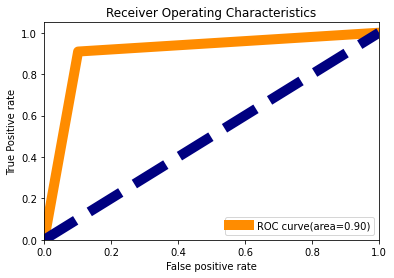

In [119]:
from sklearn.metrics import roc_curve,auc #roc=reeciver operating characteristics, auc= area under curve
fpr,tpr,thresholds=roc_curve(y_pred,y_test)
roc_auc=auc(fpr,tpr)

plt.figure()
plt.plot(fpr,tpr,color='darkorange',lw=10,label='ROC curve(area=%0.2f)'% roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False positive rate')
plt.ylabel('True Positive rate')
plt.title('Receiver Operating Characteristics')
plt.legend(loc='lower right') #loc indicates location 
plt.show()